In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/schandrasekhar/kerasenv/lib/p

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


96 48


In [4]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)







Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



/home/schandrasekhar/kerasenv/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
0s - loss: 88605.9846
Epoch 2/200
0s - loss: 61384.2120
Epoch 3/200
0s - loss: 45981.1748
Epoch 4/200
0s - loss: 30948.4538
Epoch 5/200
0s - loss: 16749.5848
Epoch 6/200
0s - loss: 6936.3185
Epoch 7/200
0s - loss: 2560.3256
Epoch 8/200
0s - loss: 1379.1988
Epoch 9/200
0s - loss: 1191.4398
Epoch 10/200
0s - loss: 1165.6893
Epoch 11/200
0s - loss: 1165.9021
Epoch 12/200
0s - loss: 1156.1322
Epoch 13/200
0s - loss: 1146.5555
Epoch 14/200
0s - loss: 1152.3523
Epoch 15/200
0s - loss: 1148.5945
Epoch 16/200
0s - loss: 1138.7973
Epoch 17/200
0s - loss: 1148.2895
Epoch 18/200
0s - loss: 1131.2100
Epoch 19/200
0s - loss: 1143.7583
Epoch 20/200
0s - loss: 1133.3089
Epoch 21/200
0s - loss: 1125.7699
Epoch 22/200
0s - loss: 1128.9598
Epoch 23/200
0s - loss: 1120.3762
Epoch 24/200
0s - loss: 1113.8487
Epoch 25/200
0s - loss: 1120.7762
Epoch 26/200
0s - loss: 1122.4172
Epoch 27/200
0s - loss: 1122.6205
Epoch 28/200
0s - loss: 1116.2697
Epoch 29/200
0s - loss: 1123.1922
Epoch 30/200
0s - 

In [5]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: ', testScore)
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


Train Score:  606.0560805376838
Test Score:  2611.8492794552367


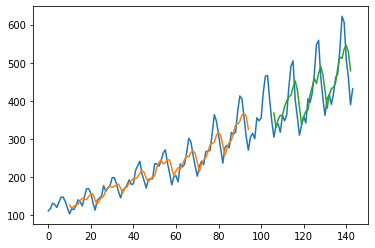

In [6]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()